In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [4]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

MSE: 0.0879348572833697


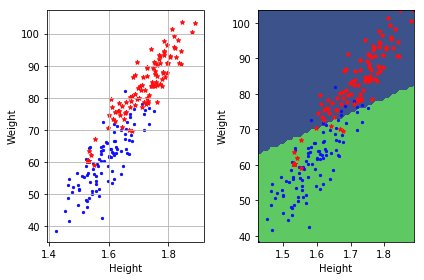

In [5]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # w = least squares with respect to tx
    err, w = least_squares(y, tx)
    print(f"MSE: {err}")
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [6]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return 1 / (1 + np.exp(-t))
# sanity checks
assert(sigmoid(0) == .5)
assert(np.all(sigmoid(np.array([0, 0, 0])) == np.array([.5, .5, .5])))

In [7]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    pred = tx @ w
    return -(y * np.log(sigmoid(pred)) + (1 - y) * np.log(1 - sigmoid(pred))).sum()

In [8]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T @ (sigmoid(tx @ w) - y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [9]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the cost: TODO
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient: TODO
    # ***************************************************
    grad = calculate_gradient(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - gamma * grad
    return loss, w

Demo!

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=43.464032305629026
Current iteration=200, loss=41.545892808759405
Current iteration=300, loss=41.098638973663114
Current iteration=400, loss=40.96487063560558
Current iteration=500, loss=40.92008945871305
Current iteration=600, loss=40.90418744318991
Current iteration=700, loss=40.89834994668996
Current iteration=800, loss=40.8961649660955
Current iteration=900, loss=40.89533753382109
Current iteration=1000, loss=40.895021964118996
Current iteration=1100, loss=40.894901086855555
Current iteration=1200, loss=40.89485466141426
Current iteration=1300, loss=40.89483680124478
Current iteration=1400, loss=40.89482992328359
Current iteration=1500, loss=40.894827272895505
loss=40.89482664256953


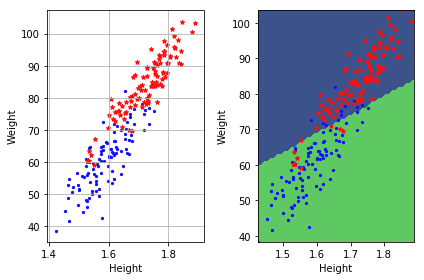

In [10]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [11]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    S = np.diag((sigmoid(tx @ w) * (1 - sigmoid(tx @ w))).flatten())
    return (tx.T @ S) @ tx

Write a function below to return loss, gradient, and hessian.

In [12]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    return loss, gradient, hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [13]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, gradient, hessian = logistic_regression(y, tx, w)
    w = w - np.linalg.inv(hessian) @ gradient
    return loss, w

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=1, the loss=63.41155373909582
Current iteration=2, the loss=47.30458619935058
Current iteration=3, the loss=41.99746742248447
Current iteration=4, the loss=40.95639863723793
Current iteration=5, the loss=40.89511993648957
Current iteration=6, the loss=40.89482561762708
Current iteration=7, the loss=40.894825609890574
loss=40.894825609890574


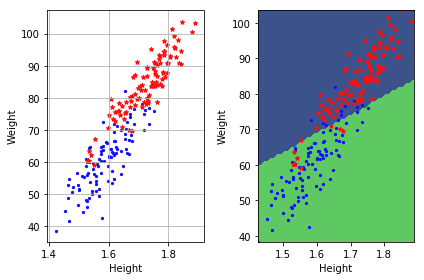

In [19]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [22]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    loss, gradient, hessian = logistic_regression(y, tx, w)
    penalised_loss = loss + lambda_ * ((w ** 2).sum())
    return loss, gradient + 2 * lambda_ * w, hessian

In [23]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient: TODO
    # ***************************************************
    loss, gradient, hessian = penalized_logistic_regression(y, tx, w, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - gamma * gradient
    return loss, w

Current iteration=0, loss=138.62943611198904, wnorm=1.106825069831575
Current iteration=100, loss=43.53643971558955, wnorm=21.49723817323847
Current iteration=200, loss=41.62663590197833, wnorm=34.12385894509307
Current iteration=300, loss=41.16773479571976, wnorm=41.27764327951249
Current iteration=400, loss=41.01995505071832, wnorm=45.357994205434565
Current iteration=500, loss=40.96354956162698, wnorm=47.71280333547713
Current iteration=600, loss=40.93919523025603, wnorm=49.08230963483244
Current iteration=700, loss=40.92762635336037, wnorm=49.88249686447837
Current iteration=800, loss=40.921720555849824, wnorm=50.351325559372086
Current iteration=900, loss=40.91854730019434, wnorm=50.62645726407682
Current iteration=1000, loss=40.91678269586128, wnorm=50.78807208924541
Current iteration=1100, loss=40.91577959483164, wnorm=50.8830593380183
Current iteration=1200, loss=40.91520153816054, wnorm=50.93890541408945
Current iteration=1300, loss=40.914865646871164, wnorm=50.97174549863888


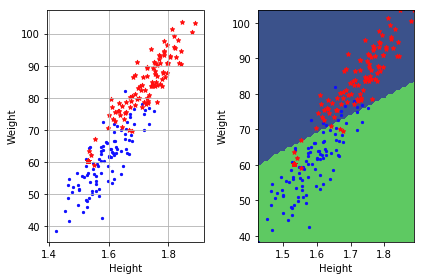

In [28]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.01
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}, wnorm={wnorm}".format(i=iter, l=loss, wnorm=(w ** 2).sum()))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l} wnorm={wnorm}".format(l=calculate_loss(y, tx, w), wnorm=(w ** 2).sum()))
    
logistic_regression_penalized_gradient_descent_demo(y, x)